# Import

In [3]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
from datetime import timedelta

from tqdm import tqdm
import time
import os
import warnings
warnings.filterwarnings("ignore")

In [5]:
from statsforecast import StatsForecast
from statsforecast.models import CrostonClassic, TSB
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

In [6]:
os.environ['NIXTLA_ID_AS_COL'] = '1'

# DF

In [4]:
def convert_to_datetime(input_string):
    year = int(input_string[1:5])
    month = int(input_string[5:])

    result_datetime = datetime(year, month,1)

    return result_datetime

In [6]:
df = pd.read_csv('..\..\Data\Verbr_2008_2021_sanitarisiert.txt',sep='\t')
df = df.T
df = df.iloc[:-1,:]
df.index = df.index.map(convert_to_datetime)

In [7]:
#drop zeros
zeros_id = train.sum()[train.sum()==0].index
df = df.drop(columns=zeros_id)

NameError: name 'train' is not defined

In [8]:
train = df.iloc[:156]
val = df.iloc[156:]

# Preparing Data

In [9]:
new_df = df.reset_index().melt( var_name='unique_id',id_vars='index', value_name='y')

new_df = new_df.rename(columns={'index': 'ds'})
new_df = new_df.reindex(columns=['unique_id','ds','y'])
train_statsforecast = new_df.loc[new_df['ds'] < '2021-1-1']
valid_statsforecast = new_df.loc[(new_df['ds'] >= '2021-1-1')]

In [10]:
predict_croston_sf = pd.DataFrame(val).copy()
predict_TSB_sf = pd.DataFrame(val).copy()

# Train

A great advantage of StatsForecast is that it allows you to build **multiple models** and compare them very easily.

## Croston

In [143]:
model = StatsForecast(models=[CrostonClassic(),
                              #TSB(alpha_d=0.2, alpha_p=0.2)
                             ],freq='M', n_jobs=-1)
model.fit(train_statsforecast)
pred_series = model.predict(h=12)
pred_series['ds'] = pd.to_datetime(pred_series['ds'])
pred_series['ds'] = pred_series['ds'] + timedelta(days=1)
pred_series.index = pred_series['ds']


In [152]:
pred_series.to_csv('Time Series/exp/Croston_Statforecast.txt')

In [37]:
predict_croston_sf = pd.read_csv('../exp/Croston_Statforecast.txt')

## TSB

### Run multi-model

In [ ]:
model = StatsForecast(models=[#CrostonClassic(),
                              TSB(alpha_d=0.2, alpha_p=0.2)
                             ],freq='M', n_jobs=-1)
model.fit(train_statsforecast)
pred_series = model.predict(h=12)
pred_series['ds'] = pd.to_datetime(pred_series['ds'])
pred_series['ds'] = pred_series['ds'] + timedelta(days=1)
pred_series.index = pred_series['ds']

In [108]:
train_statsforecast['y'].loc[train_statsforecast['unique_id']==0].shape

(156,)

### TSB

In [157]:
i = 37799
model = TSB(alpha_d=0.2, alpha_p=0.2)
model = model.fit(y=train_statsforecast['y'].loc[train_statsforecast['unique_id']==i].values)
y_hat_dict = model.predict(h=12)
predict_TSB_sf.iloc[:,i] = y_hat_dict['mean']

ZeroDivisionError: division by zero

In [158]:
i = 37799
train_statsforecast['y'].loc[train_statsforecast['unique_id']==i].values

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0], dtype=int64)

👉 Value < 0

In [11]:
(df < 0).sum().sum()

13766

👉Value **negative** to 0

In [12]:
df = df.applymap(lambda x: 0 if x < 0 else x)

In [13]:
(df < 0).sum().sum()

0

In [14]:
new_df = df.reset_index().melt( var_name='unique_id',id_vars='index', value_name='y')

new_df = new_df.rename(columns={'index': 'ds'})
new_df = new_df.reindex(columns=['unique_id','ds','y'])
train_statsforecast = new_df.loc[new_df['ds'] < '2021-1-1']
valid_statsforecast = new_df.loc[(new_df['ds'] >= '2021-1-1')]

**Train**

In [31]:
train_statsforecast.iloc[i:i+156]

,unique_id,ds,y
168,1,2008-01-01,0
169,1,2008-02-01,0
170,1,2008-03-01,0
171,1,2008-04-01,0
172,1,2008-05-01,0
...,...,...,...
319,1,2020-08-01,0
320,1,2020-09-01,0
321,1,2020-10-01,0
322,1,2020-11-01,0


In [29]:
i = 0 +156
model = TSB(alpha_d=0.2, alpha_p=0.2)
model = model.fit(y=train_statsforecast.iloc[i:i+156,2].values)
y_hat_dict = model.predict(h=12)
y_hat_dict

{'mean': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)}

In [32]:
for i in tqdm(range(150809),position=0,leave=True):
    model = TSB(alpha_d=0.2, alpha_p=0.2)
    model = model.fit(y=train_statsforecast.iloc[i:i+156,2].values)
    y_hat_dict = model.predict(h=12)
    predict_TSB_sf.iloc[:,i] = y_hat_dict['mean']
    i += 155

100%|██████████████████████████████████████████████████████████████████████████| 150809/150809 [35:42<00:00, 70.40it/s]


In [33]:
predict_TSB_sf

,0,1,2,3,4,5,6,7,8,9,...,150800,150801,150802,150803,150804,150805,150806,150807,150808,150809
2021-01-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-02-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-03-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-04-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-05-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-06-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-07-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-08-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-09-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-10-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0


In [38]:
predict_TSB_sf.to_csv('../exp/TSB_Statforecast.txt')

# Metrics:

**Mean Errors Percentage (MEP)**

only for Croston to its


<font size=5>👉 $ MEP = \%\bar{e} = \frac{1}{n}\sum\limits_{i=1}^{n}|\frac{(\hat{y}_i-y_i)}{\bar{y}}|$

<span style="color: green; font-size: 24px;">&#10004;</span>aim to forecast best mean for next 12 months

<font size =5> &#x1F4DA; Ex:

<font size=4>👉 $\hat{y}=2$

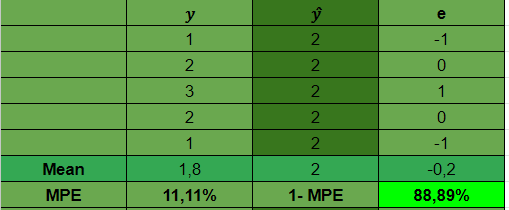

<font size=4>👉 $\hat{y}=1$

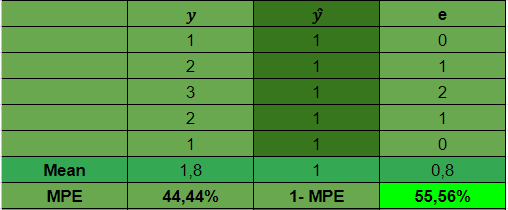

<font size=4>👉 $\hat{y}=1.8$

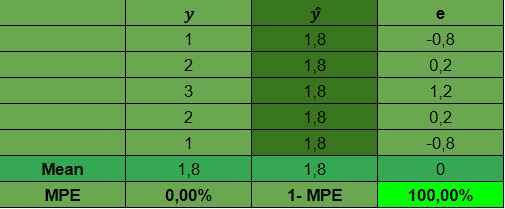

⚠️Nhược điểm

In [112]:
def MEP(y_hat,y):
    n = len(y)
    E = sum(y_hat - y)
    y_mean = y.mean()
    if y_mean!=0:
        return (1 - abs(E)/(y_mean*n))*100, False 
    return 100-100*abs(E)/n,True

```
    Return (1-MEP, is full zeroes)
```    

# Conclusion

## Preprocess

In [51]:
Classic_raw = pd.read_csv('../exp/Croston_Statforecast.txt')
TSB = pd.read_csv('../exp/TSB_Statforecast.txt')

In [52]:
Classic_raw

,ds,unique_id,ds.1,CrostonClassic
0,2021-01-01,0,2021-01-01,0.117377
1,2021-02-01,0,2021-02-01,0.117377
2,2021-03-01,0,2021-03-01,0.117377
3,2021-04-01,0,2021-04-01,0.117377
4,2021-05-01,0,2021-05-01,0.117377
...,...,...,...,...
1809715,2021-08-01,150809,2021-08-01,0.123668
1809716,2021-09-01,150809,2021-09-01,0.123668
1809717,2021-10-01,150809,2021-10-01,0.123668
1809718,2021-11-01,150809,2021-11-01,0.123668


In [53]:
Classic = Classic_raw.pivot(index = 'ds',columns='unique_id',values='CrostonClassic')
Classic

unique_id,0,1,2,3,4,5,6,7,8,9,...,150800,150801,150802,150803,150804,150805,150806,150807,150808,150809
ds,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.117377,0.0,0.594219,0.01199,0.090909,2.709642,0.064103,0.595657,27.101166,0.0,...,3.935216,0.2,0.044886,0.014925,0.134692,0.056338,3.826199,0.020408,1.918256,0.123668
2021-02-01,0.117377,0.0,0.594219,0.01199,0.090909,2.709642,0.064103,0.595657,27.101166,0.0,...,3.935216,0.2,0.044886,0.014925,0.134692,0.056338,3.826199,0.020408,1.918256,0.123668
2021-03-01,0.117377,0.0,0.594219,0.01199,0.090909,2.709642,0.064103,0.595657,27.101166,0.0,...,3.935216,0.2,0.044886,0.014925,0.134692,0.056338,3.826199,0.020408,1.918256,0.123668
2021-04-01,0.117377,0.0,0.594219,0.01199,0.090909,2.709642,0.064103,0.595657,27.101166,0.0,...,3.935216,0.2,0.044886,0.014925,0.134692,0.056338,3.826199,0.020408,1.918256,0.123668
2021-05-01,0.117377,0.0,0.594219,0.01199,0.090909,2.709642,0.064103,0.595657,27.101166,0.0,...,3.935216,0.2,0.044886,0.014925,0.134692,0.056338,3.826199,0.020408,1.918256,0.123668
2021-06-01,0.117377,0.0,0.594219,0.01199,0.090909,2.709642,0.064103,0.595657,27.101166,0.0,...,3.935216,0.2,0.044886,0.014925,0.134692,0.056338,3.826199,0.020408,1.918256,0.123668
2021-07-01,0.117377,0.0,0.594219,0.01199,0.090909,2.709642,0.064103,0.595657,27.101166,0.0,...,3.935216,0.2,0.044886,0.014925,0.134692,0.056338,3.826199,0.020408,1.918256,0.123668
2021-08-01,0.117377,0.0,0.594219,0.01199,0.090909,2.709642,0.064103,0.595657,27.101166,0.0,...,3.935216,0.2,0.044886,0.014925,0.134692,0.056338,3.826199,0.020408,1.918256,0.123668
2021-09-01,0.117377,0.0,0.594219,0.01199,0.090909,2.709642,0.064103,0.595657,27.101166,0.0,...,3.935216,0.2,0.044886,0.014925,0.134692,0.056338,3.826199,0.020408,1.918256,0.123668


In [59]:
TSB = TSB.set_index('Unnamed: 0')
TSB

,0,1,2,3,4,5,6,7,8,9,...,150800,150801,150802,150803,150804,150805,150806,150807,150808,150809
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-02-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-03-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-04-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-05-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-06-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-07-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-08-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0
2021-09-01,0.00196,0.001568,0.001254,0.001004,0.000803,0.000642,0.000514,0.000411,0.000329,0.000263,...,1.978969,1.583175,1.667183,1.734158,1.387326,1.660782,1.736952,1.62668,1.301344,0


**VALIDATION VALUE**

In [61]:
val

,0,1,2,3,4,5,6,7,8,9,...,150800,150801,150802,150803,150804,150805,150806,150807,150808,150809
2021-01-01,0,0,0,0,0,30,0,0,0,0,...,0,0,0,0,0,0,2,0,2,0
2021-02-01,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,3,0
2021-03-01,0,0,0,0,0,60,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
2021-04-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-05-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-06-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,3,0,0,0,0,0
2021-07-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-2,0,4,0,2,0
2021-08-01,0,0,0,0,0,60,0,0,0,0,...,0,0,0,0,0,0,2,0,27,0
2021-09-01,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
2021-10-01,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,4,0,9,0


In [97]:
val_non_negative = val.applymap(lambda x: 0 if x < 0 else x)

## Compare

In [128]:
# Create table

MEP_df = pd.DataFrame(index=val.columns)
MEP_df['Full-zeroes'] = True
MEP_df['Classic'] = 0
MEP_df['TSB'] = 0
MEP_df

,Full-zeroes,Classic,TSB
0,True,0,0
1,True,0,0
2,True,0,0
3,True,0,0
4,True,0,0
...,...,...,...
150805,True,0,0
150806,True,0,0
150807,True,0,0
150808,True,0,0


In [131]:
for i in tqdm(range(150809),position=0,leave=True):
    MEP_df.iloc[i,0] = MEP(Classic.iloc[:,i].values,val_non_negative.iloc[:,i].values)[1]
    MEP_df.iloc[i,1] = MEP(Classic.iloc[:,i].values,val_non_negative.iloc[:,i].values)[0].round(2)
    MEP_df.iloc[i,2] = MEP(TSB.iloc[:,i].values,val_non_negative.iloc[:,i].values)[0].round(2)


100%|████████████████████████████████████████████████████████████████████████| 150809/150809 [01:29<00:00, 1688.05it/s]


In [132]:
MEP_df.to_csv('..\exp\MEP.txt')

In [14]:
MEP_df = pd.read_csv('..\exp\MEP.txt')

In [15]:
MEP_df

,Unnamed: 0,Full-zeroes,Classic,TSB
0,0,True,88.26,99.80
1,1,True,100.00,99.84
2,2,False,-156.53,0.75
3,3,True,98.80,99.90
4,4,True,90.91,99.92
...,...,...,...,...
150805,150805,True,94.37,-66.08
150806,150806,False,36.02,74.44
150807,150807,True,97.96,-62.67
150808,150808,False,39.69,26.92


In [17]:
MEP_df = MEP_df.drop(columns=['Unnamed: 0'])

In [18]:
MEP_df

,Full-zeroes,Classic,TSB
0,True,88.26,99.80
1,True,100.00,99.84
2,False,-156.53,0.75
3,True,98.80,99.90
4,True,90.91,99.92
...,...,...,...
150805,True,94.37,-66.08
150806,False,36.02,74.44
150807,True,97.96,-62.67
150808,False,39.69,26.92


In [19]:
MEP_df.describe()

,Classic,TSB
count,150810.000000,1.508100e+05
mean,-24.621458,-4.409320e+02
std,2661.934664,8.576479e+03
min,-615169.650000,-1.193055e+06
25%,18.430000,0.000000e+00
50%,79.585000,4.843500e+01
75%,96.660000,9.999000e+01
max,100.000000,1.000000e+02


## Visuallize

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
def draw(labels,sizes):
    plt.pie(sizes, autopct='%1.2f%%')
    plt.axis('equal')  
    legend_labels = [f'{label}: {size}' for label, size in zip(labels, sizes)]
    plt.legend(legend_labels, loc='center right', bbox_to_anchor=(1.5, 0.5))

### Whole data

In [31]:
num_point = 150810

In [30]:
MEP_df_melt = pd.melt(MEP_df, id_vars=['Full-zeroes'], value_vars=['Classic', 'TSB'], var_name='Classic/TSB', value_name='value')
MEP_df_melt

,Full-zeroes,Classic/TSB,value
0,True,Classic,88.26
1,True,Classic,100.00
2,False,Classic,-156.53
3,True,Classic,98.80
4,True,Classic,90.91
...,...,...,...
301615,True,TSB,-66.08
301616,False,TSB,74.44
301617,True,TSB,-62.67
301618,False,TSB,26.92


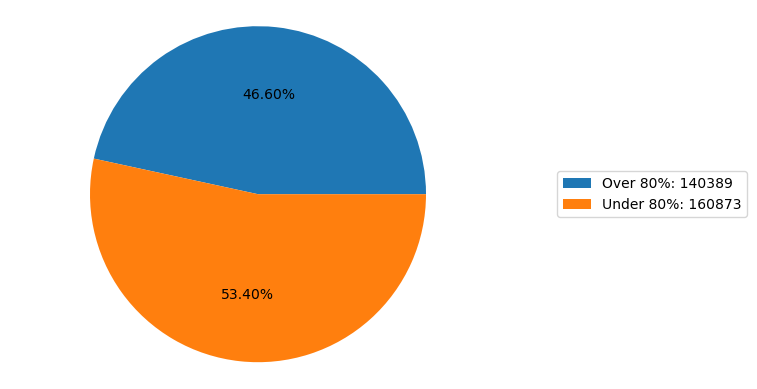

In [239]:
above_80 = len(MEP_df_melt[MEP_df_melt.value > 80])
under_80 = len(MEP_df_melt[MEP_df_melt.value < 80])
draw(['Over 80%','Under 80%'],[above_80,under_80])

<div style="margin-left: 400px;"><font size=5> Whole data

In [50]:
MEP_df_full_zeros = MEP_df_melt[MEP_df_melt['Full-zeroes']==True]
above_80_zeros = len(MEP_df_full_zeros[MEP_df_full_zeros.value > 80])
under_80_zeros = len(MEP_df_full_zeros[MEP_df_full_zeros.value < 80])

In [51]:
MEP_df_non_full_zeros = MEP_df_melt[MEP_df_melt['Full-zeroes']==False]
above_80_non_zeros = len(MEP_df_non_full_zeros[MEP_df_non_full_zeros.value > 80])
under_80_non_zeros = len(MEP_df_non_full_zeros[MEP_df_non_full_zeros.value < 80])

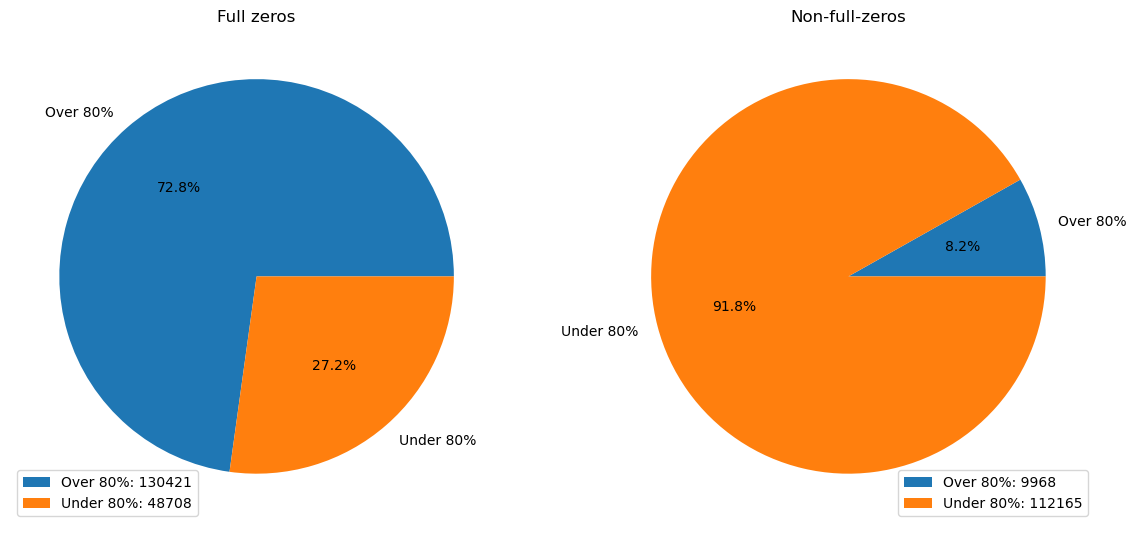

In [52]:
sizes_zeros = [above_80_zeros,under_80_zeros]
sizes_non_zeros = [above_80_non_zeros,under_80_non_zeros]
labels = ['Over 80%','Under 80%']

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,14))

ax1.pie(sizes_zeros, labels=labels, autopct='%1.1f%%')
ax1.set_title('Full zeros')
legend_labels = [f'{label}: {size}' for label, size in zip(labels, sizes_zeros)]
ax1.legend(legend_labels, loc='lower left')

ax2.pie(sizes_non_zeros, labels=labels, autopct='%1.1f%%')
ax2.set_title('Non-full-zeros')
legend_labels = [f'{label}: {size}' for label, size in zip(labels, sizes_non_zeros)]
ax2.legend(legend_labels, loc='lower right' )

### Drop worst-result

In [60]:
len(MEP_df[(MEP_df['Classic'] < 0) & (MEP_df['TSB'] < 0)].index)

2720

In [61]:
MEP_df_viz = MEP_df.drop(MEP_df[(MEP_df['Classic'] < 0) & (MEP_df['TSB'] < 0)].index)

**Full-zeros**

In [62]:
MEP_df_viz_zeroes = MEP_df.drop(MEP_df[(MEP_df['Full-zeroes'] == False)].index)

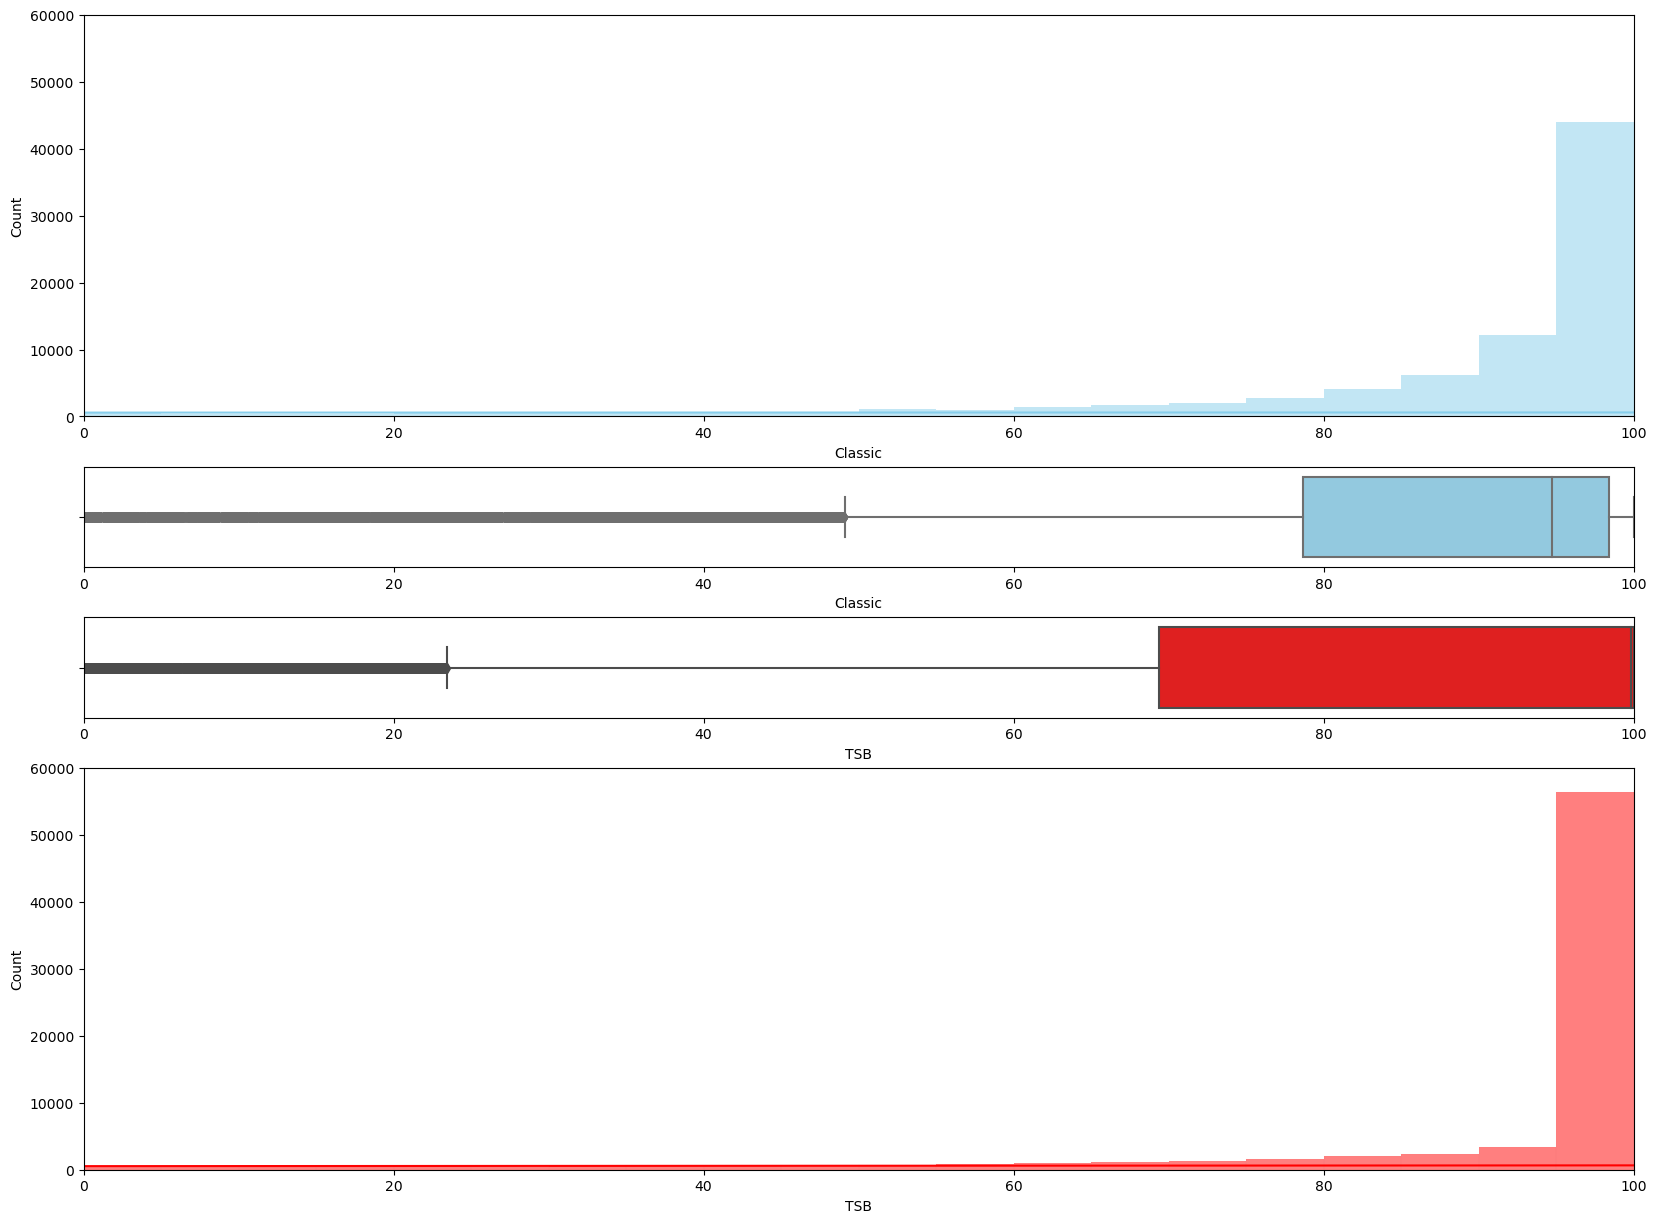

In [67]:
fig,ax = plt.subplots(4,1,figsize=(20,15),gridspec_kw={"height_ratios":(.80,.20,.20,.80)})


sns.histplot(x = MEP_df_viz_zeroes.Classic,color='skyblue',label="Classic",kde=True,ax=ax[0],bins=20,binrange=(0,100))
sns.histplot(x = MEP_df_viz_zeroes.TSB,color='red',label="TSB",kde=True,ax=ax[3],bins=20,binrange=(0,100))

sns.boxplot(x=MEP_df_viz_zeroes.Classic,color='skyblue',ax=ax[1])
sns.boxplot(x=MEP_df_viz_zeroes.TSB,color='red',ax=ax[2]);

ax[0].set_ylim(0,60000)
ax[3].set_ylim(0,60000)

for a in ax:
    a.set_xlim(0, 100)

👉 TSB better

**Non-full-zeros**

In [69]:
MEP_df_viz_non_zeroes = MEP_df.drop(MEP_df[(MEP_df['Full-zeroes'] == True)].index)

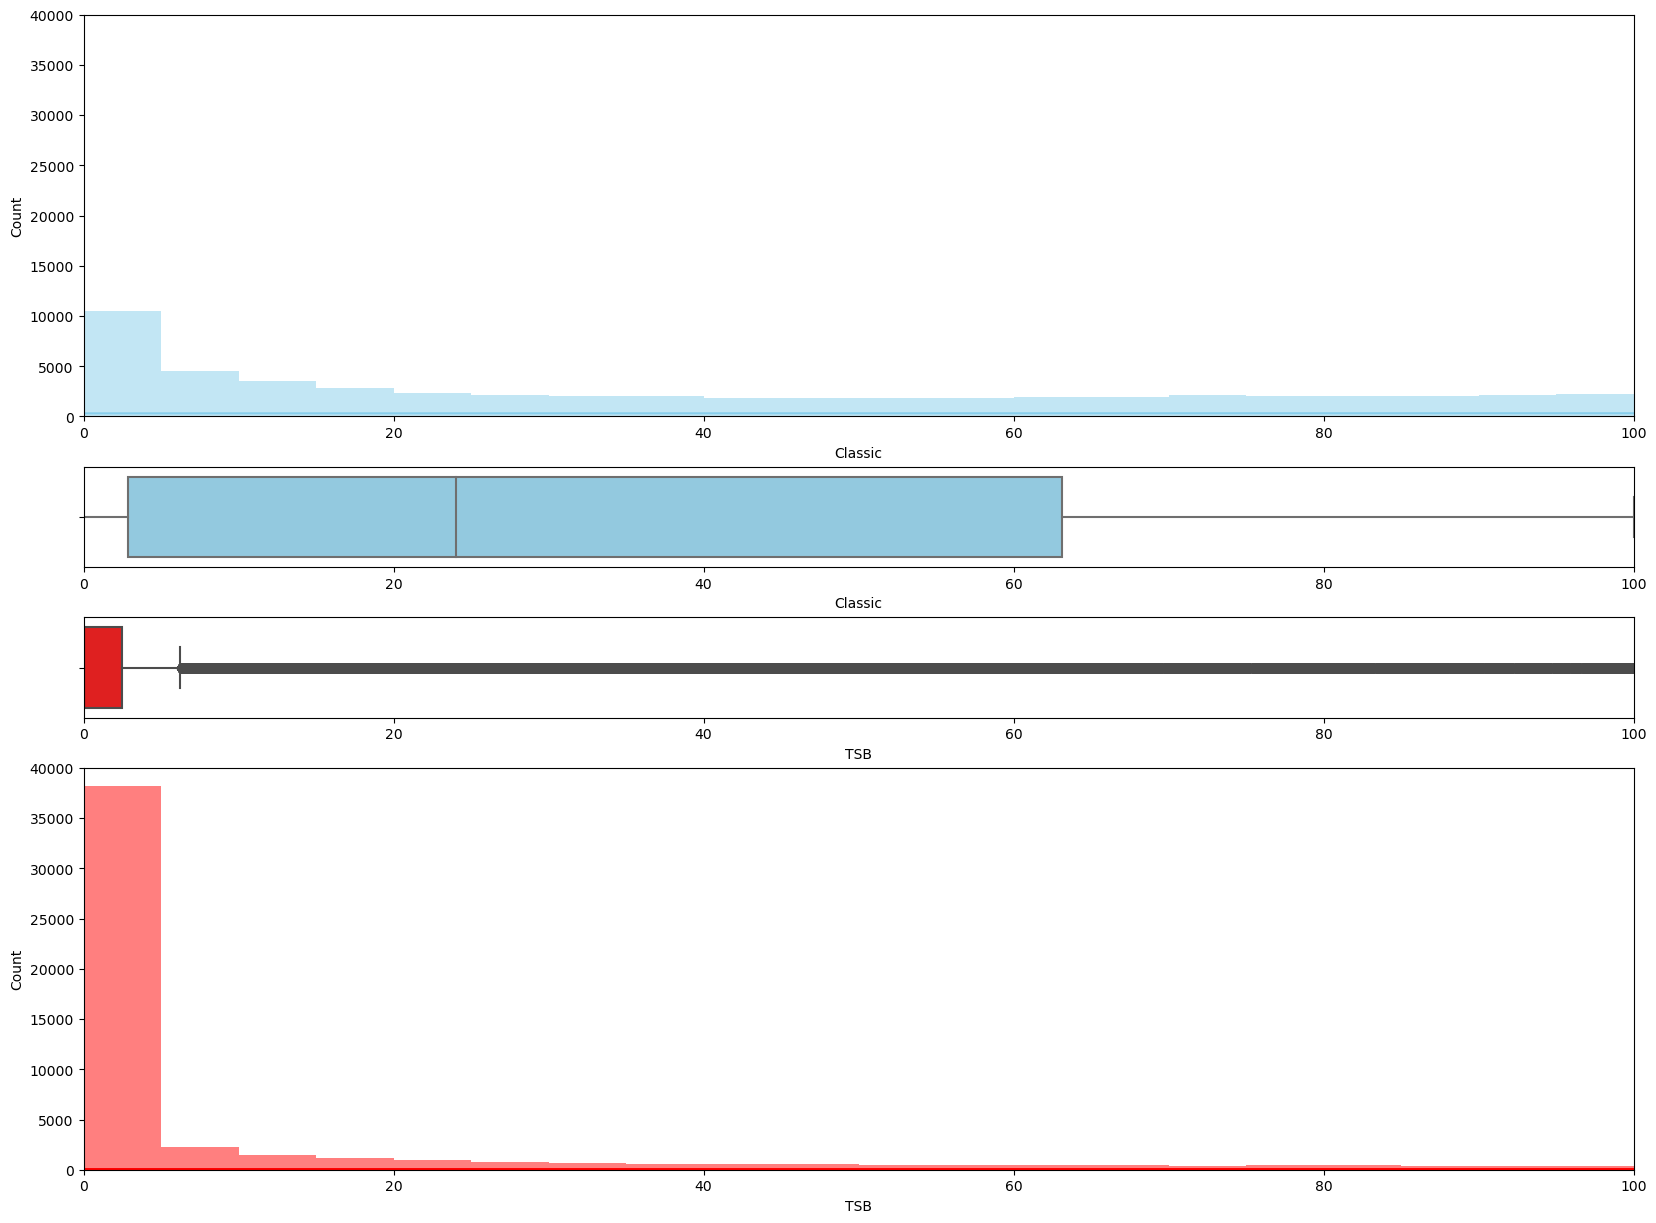

In [71]:
fig,ax = plt.subplots(4,1,figsize=(20,15),gridspec_kw={"height_ratios":(.80,.20,.20,.80)})


sns.histplot(x = MEP_df_viz_non_zeroes.Classic,color='skyblue',label="Classic",kde=True,ax=ax[0],bins=20,binrange=(0,100))
sns.histplot(x = MEP_df_viz_non_zeroes.TSB,color='red',label="TSB",kde=True,ax=ax[3],bins=20,binrange=(0,100))

sns.boxplot(x=MEP_df_viz_non_zeroes.Classic,color='skyblue',ax=ax[1])
sns.boxplot(x=MEP_df_viz_non_zeroes.TSB,color='red',ax=ax[2]);

ax[0].set_ylim(0,40000)
ax[3].set_ylim(0,40000)

for a in ax:
    a.set_xlim(0, 100)

👉 Classic better

# Emoji


<span style="color:red">&#10060;</span> : X

👉 👇


⚠️


<span style="color: green; font-size: 24px;">&#10004;</span>
: Dấu tích

💡

📚

🧮

   
<img src='link' style="width:500px;"/> : Chèn ảnh
    
<div style="margin-left: 200px;">: căn lề
    
<span style="color: red;"> Chữ_màu</span>